Arvioitu datan haku aika: 1518.0 sekuntia
Haetaan dataa...
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_152.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_153.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_154.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_155.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_156.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_157.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_158.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_159.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_160.csv <Response [404]>
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_21201_21_161.csv <Response [404]>
https://tie.digitraffic.fi/api/

<function matplotlib.pyplot.show(close=None, block=None)>

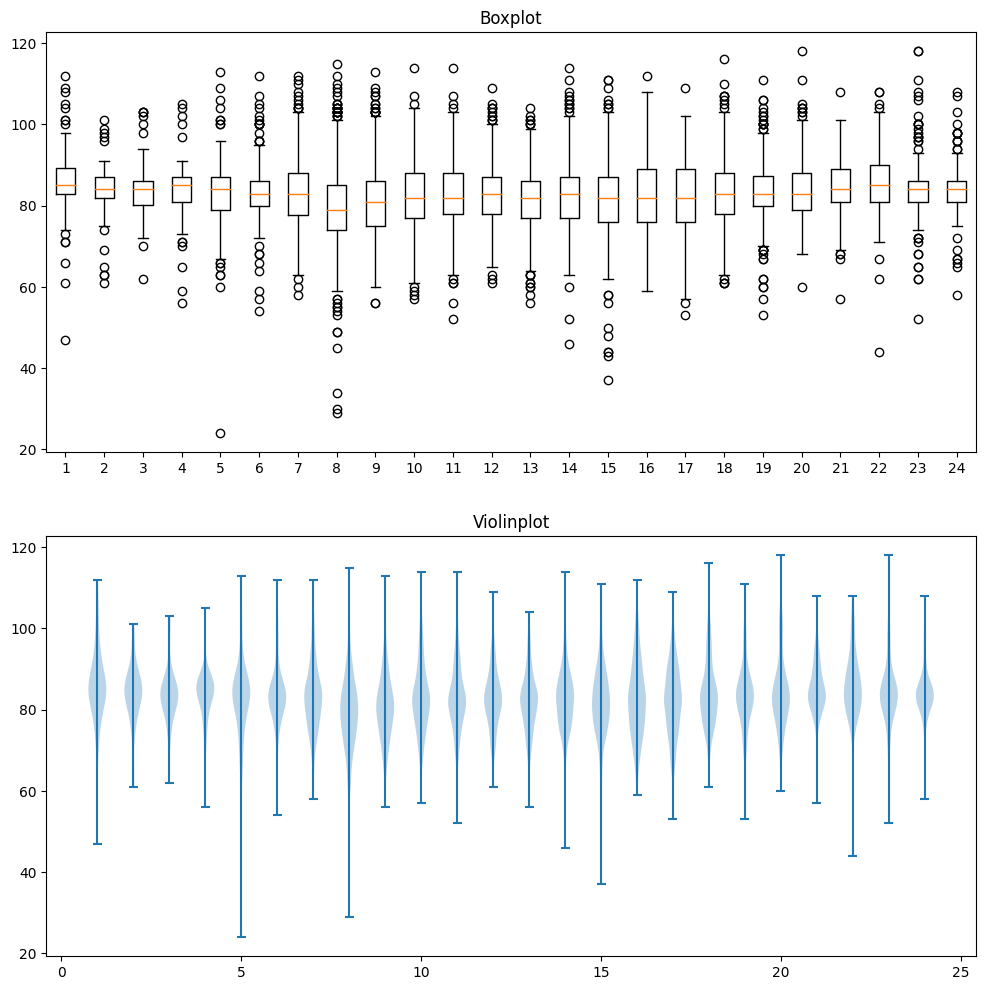

In [5]:
#Data analysointi automaattinen

#Ohjelmassa käytettävät arvot
#README.md voi tarkistaa käytettävät lamid:t
#Lam pisteen id
lamid = 21201
#Aloituspäivä
day = 1
month = 5  # 0-11  0=Tammikuu  11=Joulukuu
year = 2021
#Lopetuspäivä
day2 = 30
month2 = 5  # 0-11  0=Tammikuu  11=Joulukuu
year2 = 2023

#car type 9 = High Capacity Truck
car_type = 9
#loop delay
delay = 1.5

#Kirjastot ja päivä laskenta
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import time

plt.close("all")

def isleapyear(year):
    return year % 400 == 0 or year % 100 != 0 and year % 4 == 0

def calculatedays(day, month, year):
    days = 0
    
    if month == 0:
        days = day
    elif month == 1:
        days = day + 31
    elif month == 2:
        if isleapyear(year) == True:
            days = day + 31 + 29
        else:
            days = day + 31 + 28
    elif month == 3:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31
        else:
            days = day + 31 + 28 + 31
    elif month == 4:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30
    elif month == 5:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31
    elif month == 6:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30
    elif month == 7:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31
    elif month == 8:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31
    elif month == 9:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30
    elif month == 10:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31
    elif month == 11:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31 + 30
    
    return days

def generateurl(days, year):
    urlyear = year - 2000
    url = "https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_" + str(lamid) + "_" + str(urlyear) + "_" + str(days) + ".csv"
    return url

def getdata(days, year):
    url = generateurl(days, year)
    response_API = requests.get(url)
    if response_API.status_code == 200:
        data = response_API.text
        csvString = StringIO(data)
        result = pd.read_csv(csvString, header=None, delimiter=';')
    else:
        result = 404
    return result 

startday = calculatedays(day, month, year)
endday = calculatedays(day2, month2, year2)
if year > year2:
    temp1 = year
    temp2 = year2
    year1 = temp2
    year2 = temp1
if year == year2 and startday > endday:
    temp1 = startday
    temp2 = endday
    startday = temp2
    endday = temp1
loops = endday - startday +1
if loops < 1 and isleapyear(year) == True:
    loops = 366-startday+endday+1
if loops < 1:
    loops = 365-startday+endday+1
if year < year2 and startday == endday:
    years = year2 - year
    loops = years * 365
if year < year2 and startday < endday:
    years = year2 - year
    loops = loops + years * 365 -1

dataholder = pd.DataFrame()
starttime = time.time()
estimated_time = delay*loops + 0.5*loops
print("Arvioitu datan haku aika: " + str(estimated_time) + ' sekuntia')
print("Haetaan dataa...")
notfound = 0

for i in range(loops):
    days = startday + i
    
    if days > 365 and isleapyear(year) == False:
        if(year2 - year) == 1:
            days = days - 365 
            url = generateurl(days, year2)
        if (year2 - year) > 1:
            days = days - 365
            url = generateurl(days, year+1)
            if days > 366 and isleapyear(year+1) == True:
                days = days - 366
                url = generateurl(days, year+2)
                if days > 365:
                    days = days - 365
                    url = generateurl(days, year+3)
            elif days > 365 and isleapyear(year+1) == False:
                days = days - 365
                url = generateurl(days, year+2)
                if days > 365:
                    days = days - 365
                    url = generateurl(days, year+3)
        response_API = requests.get(url)
        if response_API.status_code == 200:
            data = response_API.text
            csvString = StringIO(data)
            result = pd.read_csv(csvString, header=None, delimiter=';')
            parseddata = result.loc[(result[10] == car_type) & (result[12] == 0)]
            dataholder = pd.concat([dataholder, parseddata])
            #print("data found")
        else:
            print(str(url) + " " + str(response_API))
            notfound = notfound + 1
    elif days > 366 and isleapyear(year) == True:
        if (year2 - year) == 1:
            days = days - 366
            url = generateurl(days, year2)
        if (year2 - year) > 1:
            days = days - 365
            url = generateurl(days, year+1)
            if days > 365:
                days = days - 365
                url = generateurl(days, year+2)
                if days > 365:
                    days = days - 365
                    url = generateurl(days, year+3)
        response_API = requests.get(url)
        if response_API.status_code == 200:
            data = response_API.text
            csvString = StringIO(data)
            result = pd.read_csv(csvString, header=None, delimiter=';')
            parseddata = result.loc[(result[10] == car_type) & (result[12] == 0)]
            dataholder = pd.concat([dataholder, parseddata])
            #print("data found")
        else:
            print(str(url) + " " + str(response_API))
            notfound = notfound + 1
    else: 
        url = generateurl(days, year)
        response_API = requests.get(url)
        if response_API.status_code == 200:
            data = response_API.text
            csvString = StringIO(data)
            result = pd.read_csv(csvString, header=None, delimiter=';')
            parseddata = result.loc[(result[10] == car_type) & (result[12] == 0)]
            dataholder = pd.concat([dataholder, parseddata])
            #print("data found")
        else:
            print(str(url) + " " + str(response_API))
            notfound = notfound + 1
    time.sleep(delay)

endtime = time.time()
totaltime = endtime - starttime

print("Datan hakeminen valmis: " + str(totaltime) + ' sekuntia')
if notfound > 0:
    print(str(notfound) + " päivältä ei löytynyt dataa")

data1 = []
data2 = []
data3 = []
list_data = []

for i in range(24):
    timedata = dataholder.loc[(dataholder[10] == car_type) & (dataholder[3] == i)]
    data_array = [timedata]
    loopeddata = pd.concat(data_array)
    time_mean = loopeddata.iloc[:, 3].mean()
    speeds_mean = loopeddata.iloc[:, 11].mean()
    #car_count = loopeddata.iloc[:, 3].value_counts()[i]
    data_list = loopeddata.iloc[:, 11].tolist()
    list_data.append(data_list)
    data1.append(time_mean)
    data2.append(speeds_mean)
    #data3.append(car_count)

list = {'hours':data1, 'average-speeds':data2}
df = pd.DataFrame(list)

print('lamid: ' + str(lamid) + ' datan järjestely valmis')

#Näytä data boxplot ja violinplot
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
day_range = loops - notfound
axs[0].boxplot(list_data)
axs[0].set_title("Boxplot")

#Violinplot toimii, mutta ei toimi silloin kun on vajaata dataa
axs[1].violinplot(list_data)
axs[1].set_title("Violinplot")

print("lamid:", str(lamid))
print("Keskimääräiset nopeudet HCT " + str(day_range) + " päivän ajalta")
plt.show